# Week 1: Setup + EDA

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

## 2. Import Data

In [30]:
dataset = pd.read_csv('heart_disease_uci.csv')

## 3. Data Quality Checks

### 3.0 Explore Data types

In [7]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [18]:
dataset.shape

(920, 16)

In [3]:
dataset.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


### 3.1 Missing Values

In [ ]:
missing_values = dataset.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 trestbps     59
chol         30
fbs          89
thalch       55
exang        55
oldpeak      62
slope       308
ca          609
thal        484
dtype: int64


In [31]:
dataset.dropna(subset=['restecg'], inplace=True) # since we have only two rows missing the 'restecg' variable, we'll drop them

#### Separate Numerical and Categorical Columns

Identify and separate the numerical and categorical columns that still contain missing values. This will allow us to apply different imputation strategies based on the column type.


In [33]:
print("Unique values for 'fbs':", dataset['fbs'].unique())
print("Unique values for 'exang':", dataset['exang'].unique())
print("Unique values for 'slope':", dataset['slope'].unique())
print("Unique values for 'ca':", dataset['ca'].unique())

Unique values for 'fbs': [True False nan]
Unique values for 'exang': [False True nan]
Unique values for 'slope': ['downsloping' 'flat' 'upsloping' nan]
Unique values for 'ca': [ 0.  3.  2.  1. nan]


In [ ]:
missing_numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
missing_categorical_cols = ['fbs', 'exang', 'slope', 'ca', 'thal']

print("Numerical columns with missing values:", missing_numerical_cols)
print("Categorical columns with missing values:", missing_categorical_cols)

Numerical columns with missing values: ['trestbps', 'chol', 'thalch', 'oldpeak']
Categorical columns with missing values: ['fbs', 'exang', 'slope', 'ca', 'thal']


#### Analyze Numerical Skewness and Outliers

For each numerical column with missing values, we'll plot a histogram and a boxplot to visualize its distribution, skewness, and potential outliers. Calculate the skewness metric to quantify its distribution.


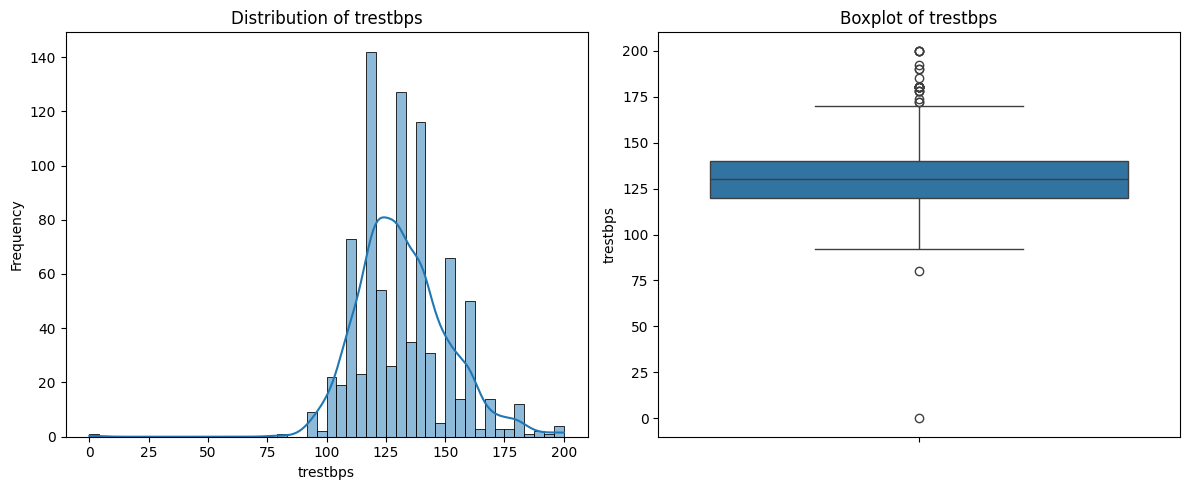

Skewness for 'trestbps': 0.2125

--------------------------------------------------



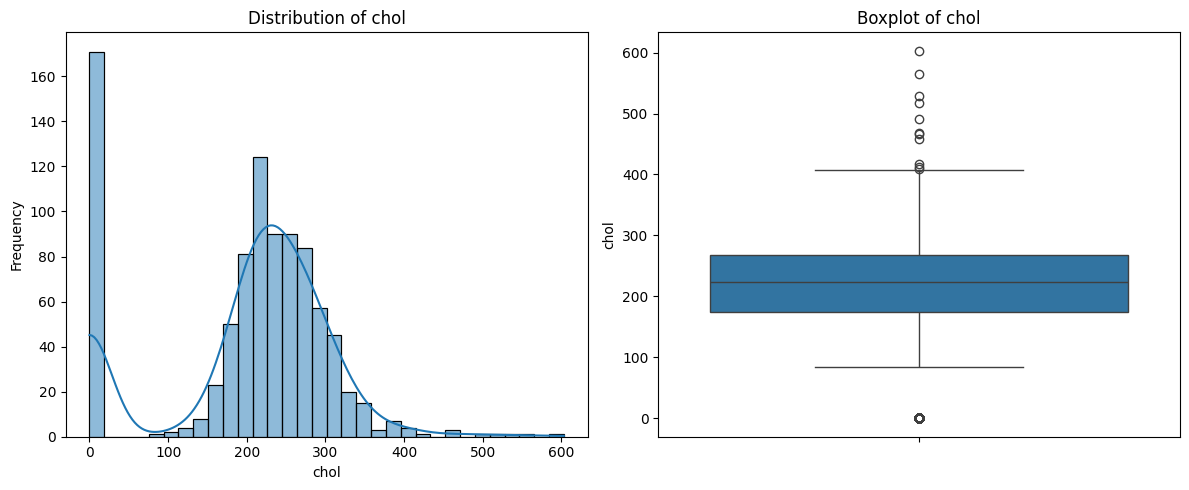

Skewness for 'chol': -0.6146

--------------------------------------------------



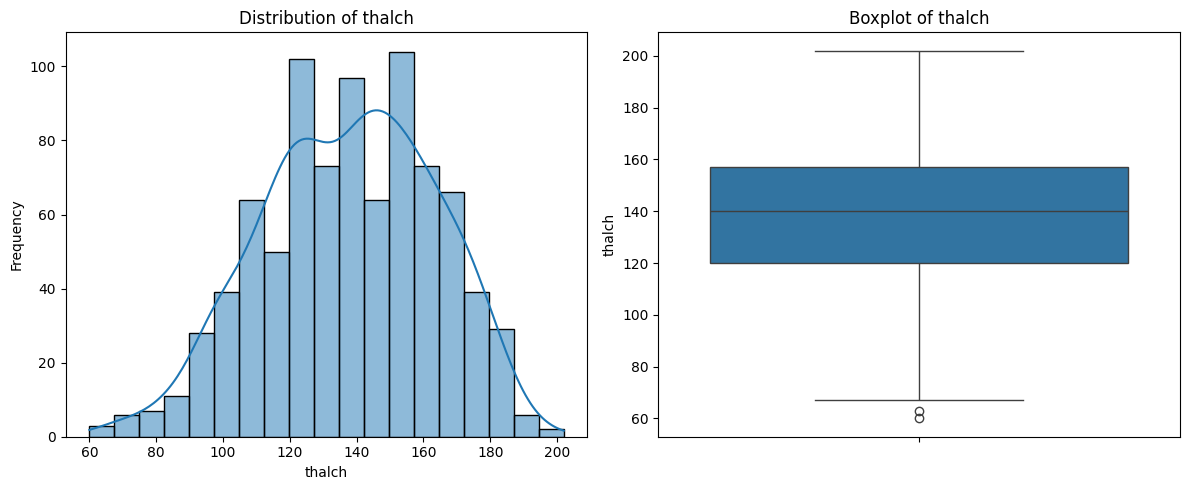

Skewness for 'thalch': -0.2093

--------------------------------------------------



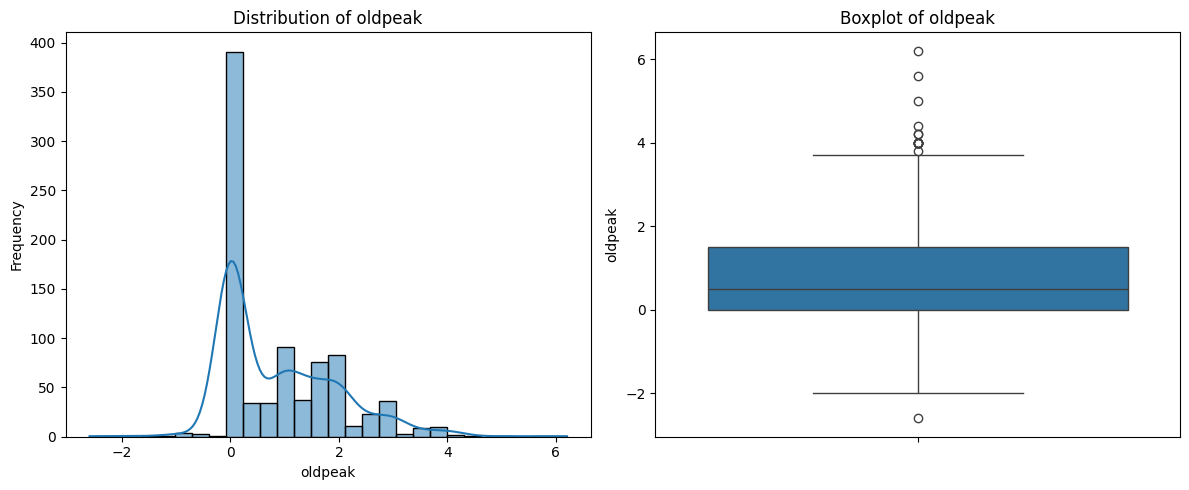

Skewness for 'oldpeak': 1.0380

--------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in missing_numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Calculate skewness
    skewness_val = dataset[col].skew()
    print(f"Skewness for '{col}': {skewness_val:.4f}")
    print("\n" + "-"*50 + "\n")

#### Determine Optimal Imputation Strategy for Numerical Columns


Based on the analysis of skewness and outliers, decide whether to use 'mean' or 'median' imputation for each numerical column. For highly skewed distributions or those with significant outliers, 'median' is often preferred due to its robustness.


In [ ]:
numerical_imputation_strategies = {
    'trestbps': 'mean',  # Skewness 0.2125 (low skewness), use mean
    'chol': 'median',    # Skewness -0.6146 (moderate skewness), use median
    'thalch': 'mean',    # Skewness -0.2093 (low skewness), use mean
    'oldpeak': 'median'  # Skewness 1.0380 (high skewness), use median
}

print("Numerical Imputation Strategies:", numerical_imputation_strategies)

Numerical Imputation Strategies: {'trestbps': 'mean', 'chol': 'median', 'thalch': 'mean', 'oldpeak': 'median'}


In [ ]:
categorical_imputation_strategies = {col: 'most_frequent' for col in missing_categorical_cols}

print("Categorical Imputation Strategies:", categorical_imputation_strategies)

Categorical Imputation Strategies: {'fbs': 'most_frequent', 'exang': 'most_frequent', 'slope': 'most_frequent', 'ca': 'most_frequent', 'thal': 'most_frequent'}


In [ ]:
from sklearn.impute import SimpleImputer

# Apply imputation for numerical columns
for col, strategy in numerical_imputation_strategies.items():
    imputer = SimpleImputer(strategy=strategy)
    dataset[col] = imputer.fit_transform(dataset[[col]]).ravel()

# Apply imputation for categorical columns
for col, strategy in categorical_imputation_strategies.items():
    imputer = SimpleImputer(strategy=strategy)
    dataset[col] = imputer.fit_transform(dataset[[col]]).ravel()

print("Missing values after imputation:")
print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Missing values after imputation:
Series([], dtype: int64)


#### Summary:


All missing values in the dataset have been successfully handled using `sklearn` imputers.

The imputation strategies applied are:
*   **Numerical Features:**
    *   `trestbps`: Mean imputation (skewness 0.2125).
    *   `chol`: Median imputation (skewness -0.6146).
    *   `thalch`: Mean imputation (skewness -0.2093).
    *   `oldpeak`: Median imputation (skewness 1.0380).
*   **Categorical Features:**
    *   `fbs`, `exang`, `slope`, `ca`, `thal`: Most frequent imputation.

### Data Analysis Key Findings
*   Initially, nine columns (`trestbps`, `chol`, `fbs`, `thalch`, `exang`, `oldpeak`, `slope`, `ca`, `thal`) were identified with missing values.
*   These columns were categorized into four numerical (`trestbps`, `chol`, `thalch`, `oldpeak`) and five categorical (`fbs`, `exang`, `slope`, `ca`, `thal`) features.
* **Note:** 'ca' is numeric, but from the unique values [0., 1., 2., 3.] it appears to be an ordinal categorical variable representing the number of major vessels, also with missing values.
*   Numerical feature skewness analysis guided the imputation strategy: `trestbps` (0.2125) and `thalch` (-0.2093) were imputed with their respective means, while `chol` (-0.6146) and `oldpeak` (1.0380) were imputed with their respective medians due to moderate to high skewness.
*   All identified categorical features (`fbs`, `exang`, `slope`, `ca`, `thal`) were imputed using the 'most\_frequent' strategy.
*   Following the imputation, a verification confirmed that no missing values remained in the `dataset` DataFrame.



### 3.2 Duplicates

In [5]:
dataset.duplicated().sum()

np.int64(0)

No duplicates found



### 3.3 Data Types Consistency

### 3.4 Outliers (domain checks, IQR/z-score)

## 4. Exploratory Data Analysis (EDA)

4.1 Univariate Distributions (histograms, KDE, boxplots)

4.2 Bivariate Relationships (scatter, groupby stats)

4.4 Target Variable (`y`) Inspection

4.5 Class Balance (counts, %)

## 5. Feature Engineering

5.1 Domain Features

5.2 Aggregations / Ratios / Interactions

5.3 Temporal/Recency Features (if applicable)

5.4 Feature Documentation (what, why, how)

## 6. Imbalance Handling (Preliminary)

6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)

6.2 Chosen Approach & Justification

6.3 Sanity Checks (no leakage, applied only to train)

---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing & Data Pipeline (DL)

1.1 Train/Validation/Test Split (with stratification if needed)

1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

1.4 DataLoaders (batch size, shuffling, class-balanced sampling)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

2.2 Decision Tree (default settings)

2.3 Random Forest (default settings)

2.4 XGBoost (default settings)

2.5 LightGBM (default settings)

2.6 Fit → Predict → Evaluate (val set)

## 3. Neural Network Modeling

3.1 Embedding Layers for Categorical Features

3.2 Hidden Blocks (Dense + BatchNorm + Dropout + ReLU)

3.3 Output Head & Loss (BCEWithLogits/CrossEntropy/MSE)

3.4 Optimizer (Adam/AdamW), Weight Decay

3.5 Regularization & Early Stopping

3.6 Dropout Rates

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Steps + Model

---
# Week IV: Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file